При помощи методов Эйлера и Рунге-Кутты 4-го порядка найти решение обыкновенного дифференциального уравнения, описывающего следующую физическую задачу:

Частица движется замедленно по окружности радиуса r так, что ее тангенциальное и  нормальное ускорения в каждый момент времени равны друг другу по  модулю. В начальный момент точке была сообщена скорость v0. Найти скорость точки как функцию пройденного пути s.

Перед тем, как писать программу, необходимо составить само дифференциальное уравнение в форме dx/dt = f(x, t), где x - искомая функция, t - независимая переменная (например, время), f - известная (заданная аналитически) зависимость.

Программа должна быть реализована с использованием библиотеки numpy.
Значения всех входных параметров должны считываться программой из файла. Решение также должно выводиться в файл.\
Под решением понимается список моментов времени и список значений искомой функции в эти моменты времени.

In [1]:
import sympy as sym

#Создание символьных перменных
t, v0, r= sym.symbols('t v0 r') 
v, s = sym.symbols('v, s', cls = sym.Function)

#Первое дифференциальное уравнение для скорости
eq1 = sym.Eq(v(t).diff(t), -v(t)**2/r)
v1 = sym.dsolve(eq1,ics={v(0):v0})

#Зависимость скорости от времени
v1

Eq(v(t), -r/(-r/v0 - t))

In [2]:
#Задаем связь скорости и времени
v = sym.symbols('v')
exp = sym.Eq(v - 1/(1/v0 + t/r))

#Выражаем время через скорость
sym.solve(exp, t)

D:\Anaconda\lib\site-packages\sympy\core\relational.py:495: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


[-r/v0 + r/v]

In [3]:
#Второе дифференциальное уравнение для пройденного пути
eq2 = sym.Eq(s(t).diff(t), 1/(1/v0 + t/r))
s1 = sym.dsolve(eq2, ics={s(0):0})

#Зависимость Пройденного пути от времени
s1

Eq(s(t), -r*log(r) + r*log(r + t*v0))

In [4]:
#Задаем зависимость S и v
v = sym.symbols('v')
expr = r*sym.ln(1 + t*v0/r)
expr1 = expr.subs(t, r/v-r/v0)

#Находим как зависит S от v
expr1 = sym.simplify(expr1)

#Находим зависимость v от S
s = sym.symbols('s')
exp1 = sym.Eq(s, expr1)
sym.solve(exp1, v)

[v0*exp(-s/r)]

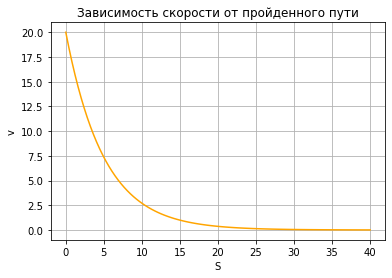

In [5]:
import matplotlib.pyplot as plt
import numpy as np
#Создание массивов для графиков
x = np.linspace(0, 40, 100)
y = 20*np.exp(-x/5)

#Построение графика
plt.plot(x, y, color='orange')
plt.title('Зависимость скорости от пройденного пути')
plt.xlabel("S")            # подпись оси абсцисс
plt.ylabel("v")
plt.grid()
plt.show()

In [6]:
#Функция для дифференциального уравнения
def f(v, t, r): 
    return -v**2 / r 

def f1(S, t, r, v0):
    v = 1/(1/v0 + t/r)
    return v

#Метод Эйлера
def euler_method(h, v0, r): 
    t = [0] 
    v = [v0] 
    s = [0] 
 
    while True: 
        v_next = v[-1] + h * f(v[-1], t[-1], r) #Считаем значение скорости
        t_next = t[-1] + h 
        s_next = s[-1] + v[-1] * h #Считаем значение пройденного пути
 
        #Добавляем найденные значения в точке в соответствующие массивы
        v.append(v_next) 
        t.append(t_next) 
        s.append(s_next) 
        
        if abs(v[-1] - v[-2]) < 0.001 * h: #Условие выхода, разность двух послледних
                break # значений скоростей меньше одной десятитысячной шага
 
    return s, v 

def runge_kutta_method(h, v0, r): 
    t = [0] 
    v = [v0] 
    s = [0] 
 
    while True:
        # Реализация алгоритма метода для скорости
        k1 = h * f(v[-1], t[-1], r) 
        k2 = h * f(v[-1] + 0.5 * k1, t[-1] + 0.5 * h, r) 
        k3 = h * f(v[-1] + 0.5 * k2, t[-1] + 0.5 * h, r) 
        k4 = h * f(v[-1] + k3, t[-1] + h, r) 
        v_next = v[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6 #Считаем значение скорости
        t_next = t[-1] + h 
        
        #Реализация алгоритма метода для пройденного пути
        c1 = h * f1(s[-1], t[-1], r, v0)
        c2 = h * f1(s[-1], t[-1] + 0.5 * h, r, v0)
        c3 = h * f1(s[-1], t[-1] + 0.5 * h, r, v0)
        c4 = h * f1(s[-1], t[-1] + h, r, v0)
        s_next = s[-1] + (c1 + 2 * c2 + 2 * c3 + c4) / 6
        
        v.append(v_next) 
        t.append(t_next) 
        s.append(s_next) 
         
        if abs(v[-1] - v[-2]) < 0.001 * h: #Условие выхода как и в методе Эйлера
                break
    return s, v 

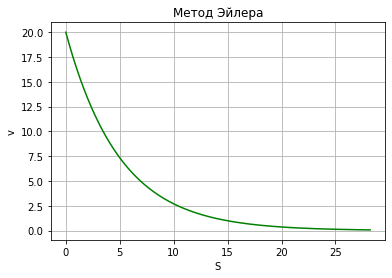

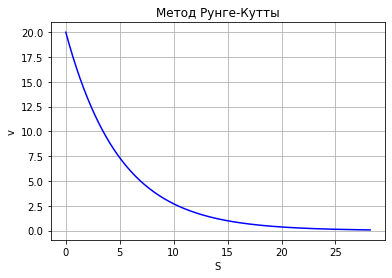

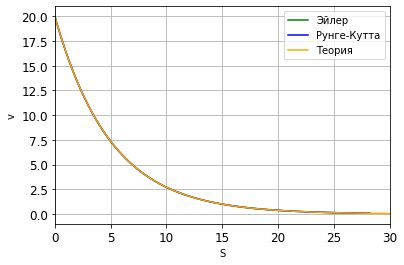

In [7]:
#Считываем параметры из файла 
with open("input.txt", "r") as file: 
    params = file.read().splitlines() 

import matplotlib.pyplot as plt
import numpy as np

h = float(params[0]) 
v0 = float(params[1]) 
r = float(params[2]) 

#Строим график
(s1, v1) = euler_method(h, v0, r)
plt.plot(s1, v1, color='green')
plt.title('Метод Эйлера')
plt.xlabel("S")          
plt.ylabel("v")
plt.grid()
plt.show()

(s2, v2) = runge_kutta_method(h, v0, r)
plt.plot(s1, v1, color='blue')
plt.title('Метод Рунге-Кутты')
plt.xlabel("S")          
plt.ylabel("v")
plt.grid()
plt.show()

with open("Euler.txt", "w") as file: 
    file.write("Euler Method:\n") 
    for i in range(len(s1)): 
        file.write(f"S = {s1[i]:.3f}, v = {v1[i]:.3f}\n") 
 
with open("Runge-Kutta.txt", "w") as file: 
    file.write("Runge-Kutta Method:\n") 
    for i in range(len(s2)): 
        file.write(f"S = {s2[i]:.3f}, v = {v2[i]:.3f}\n")

x = np.linspace(0, 40, 100)
y = 20*np.exp(-x/5)

plt.plot(s1, v1, color='green')
plt.plot(s2, v2, color='blue')
plt.plot(x, y, color='orange')
plt.tick_params(labelsize=12)
plt.xlim(0.0, 30.0)
plt.xlabel("S")          
plt.ylabel("v")
plt.legend(["Эйлер", "Рунге-Кутта", "Теория"])
plt.grid()
plt.show()

Средняя погрешность метода Эйлера: 0.21259
Средняя погрешность метода Рунге Кутты: 5.256e-05


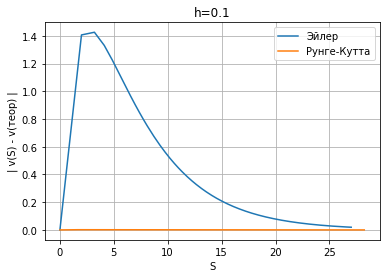

Средняя погрешность метода Эйлера: 0.01968
Средняя погрешность метода Рунге Кутты: 5.990e-09


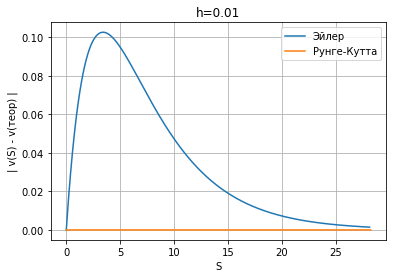

Средняя погрешность метода Эйлера: 0.00196
Средняя погрешность метода Рунге Кутты: 6.318e-13


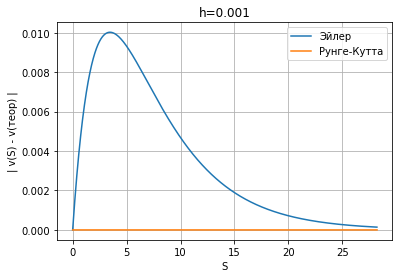

Средняя погрешность метода Эйлера: 0.00020
Средняя погрешность метода Рунге Кутты: 1.426e-12


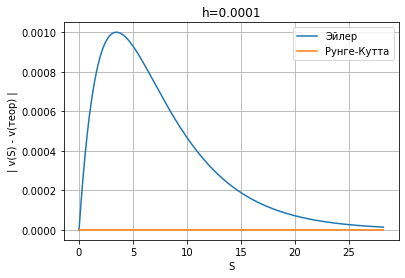

In [8]:
#Зависимость ошибки от шага
osh1 = []
osh2 = []
for i in range(1, 5):
    h1 = 10**(-i)
    (s1, v1) = euler_method(h1, v0, r)
    (s2, v2) = runge_kutta_method(h1, v0, r)
    
    #Погрешность для Метода Эйлера
    v_sum = 0
    eul_pogr = []
    for i in range (len(v1)):
        v_temp = abs(v1[i]-v0*np.exp(-s1[i]/r))
        v_sum += v_temp/(v0*np.exp(-s1[i]/r))
        eul_pogr.append(v_temp)
    v_sum /= len(v1)
    osh1.append(v_sum)
    print(f"Средняя погрешность метода Эйлера: {v_sum:.5f}")
          
    #Погрешность для Метода Рунге-Кутты    
    v_sum = 0      
    r_k_pogr = []
    for i in range (len(v2)):
        v_temp = (abs(v2[i]-v0*np.exp(-s2[i]/r)))
        v_sum += v_temp/(v0*np.exp(-s2[i]/r))
        r_k_pogr.append(v_temp)    
    v_sum /= len(v2)
    osh2.append(v_sum)
    print(f"Средняя погрешность метода Рунге Кутты: {v_sum:.3e}")

    plt.plot(s1, eul_pogr, s2, r_k_pogr)
    plt.grid()
    plt.xlabel('S')
    plt.ylabel('| v(S) - v(теор) |')
    plt.title('h='+str(h1))
    plt.legend(["Эйлер", "Рунге-Кутта"])
    plt.show()

O(h) для метода Эйлера: 1.0117590410890465
O(h) для метода Рунге-Кутты: 3.951938618857671


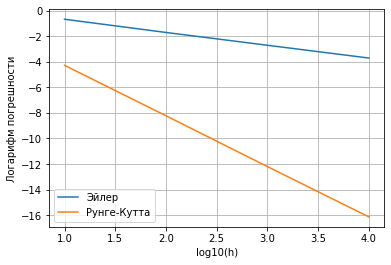

In [9]:
#Код не компилируется с числами типа np.float128, поэтому погрешность для h=0.0001 Метода Рунге-Кутты на несколько порядков больше реальной
#я заменю osh2[3] на 7.326e-17 (osh2[3]/2 * 0.0001)
osh2[3] =  7.326*10**(-17)
Osh1 = [np.log10(osh1[i]) for i in range(4)]
Osh2 = [np.log10(osh2[i]) for i in range(4)]
arg = range(1, 5)

# Графики логарифмических зависимостей погрешности численных методов от шага
plt.plot(arg, Osh1, arg, Osh2)
plt.grid()
plt.ylabel('Логарифм погрешности')
plt.xlabel('lоg10(h)')
plt.legend(["Эйлер", "Рунге-Кутта"])

#Метод логарифмических невязок
Oh_Eu, Oh_RK = 0, 0
for i in range(3):
    Oh_Eu += Osh1[i] - Osh1[i + 1]
    Oh_RK += Osh2[i] - Osh2[i + 1]
Oh_Eu /= 3
Oh_RK /= 3
print('O(h) для метода Эйлера:', Oh_Eu)
print('O(h) для метода Рунге-Кутты:', Oh_RK)

In [10]:
#Экстраполяция Ричардсона

#Погрешность метода Эйлера
(sh4, vh4) = euler_method(0.004, v0, r)
(sh2, vh2) = euler_method(0.002, v0, r)
(sh1, vh1) = euler_method(0.001, v0, r)

#Определяем значение скорости в момент, когда тело прошло 5 м
with open("Euler1.txt", "w") as file: 
    for i in range(len(sh1)): 
        file.write(f"S = {sh1[i]:.3f}, v = {vh1[i]:.3f}\n") 

with open("Euler2.txt", "w") as file: 
    for i in range(len(sh2)): 
        file.write(f"S = {sh2[i]:.3f}, v = {vh2[i]:.3f}\n") 
        
with open("Euler4.txt", "w") as file: 
    for i in range(len(sh4)): 
        file.write(f"S = {sh4[i]:.3f}, v = {vh4[i]:.3f}\n")

#Для v(h/4) взяли среднее между 7.331 и 7.288        
p = np.log(abs(7.288-7.331)/abs(7.331-7.310))/np.log(2)
print(p)

#Погрешность метода Рунге-Кутты
(sh4, vh4) = runge_kutta_method(0.04, v0, r)
(sh2, vh2) = runge_kutta_method(0.02, v0, r)
(sh1, vh1) = runge_kutta_method(0.01, v0, r)

#Определяем значение скорости в момент, когда тело прошло 10 м
with open("RungK1.txt", "w") as file: 
    for i in range(len(sh1)): 
        file.write(f"S = {sh1[i]:.3f}, v = {vh1[i]:.8f}\n") 

with open("RungK2.txt", "w") as file: 
    for i in range(len(sh2)): 
        file.write(f"S = {sh2[i]:.3f}, v = {vh2[i]:.8f}\n") 
        
with open("RungK4.txt", "w") as file: 
    for i in range(len(sh4)): 
        file.write(f"S = {sh4[i]:.3f}, v = {vh4[i]:.8f}\n")

p = np.log(abs(2.70270585 - 2.70270291)/abs(2.70270291 - 2.70270272))/np.log(2)
print(p)

1.0339473319232881
3.9517448299935016


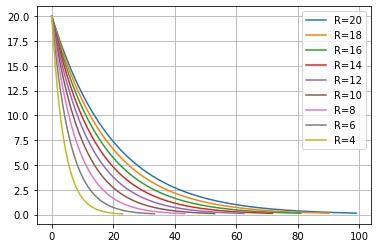

In [27]:
s = []
v = []
l = []
for R in range(20, 3 ,-2):
    s_t, v_t = runge_kutta_method(0.01, v0, R)
    plt.plot(s_t, v_t)
    lab = 'R='+str(R)
    l.append(lab)
    
plt.legend(l)
plt.grid()

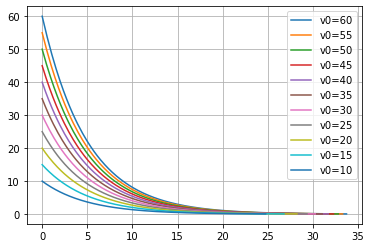

In [28]:
s = []
v = []
l = []
for v_n in range(60, 9 ,-5):
    s_t, v_t = runge_kutta_method(0.01, v_n, r)
    plt.plot(s_t, v_t)
    lab = 'v0='+str(v_n)
    l.append(lab)
    
plt.legend(l)
plt.grid()